In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stat

## Exploratory Analysis And Data Cleaning

Read in the data:

In [8]:
hr = pd.read_csv("HR.csv")
#hr = hrdata.sample(frac=0.66, random_state=25)
#hrtest = hrdata.drop(hr.index)

#print(f"No. of training examples: {hr.shape[0]}")
#print(f"No. of testing examples: {hrtest.shape[0]}")


In [9]:
hr.shape

(1470, 35)

In [10]:
hr.describe

<bound method NDFrame.describe of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Educati

In [11]:
# One-hot encode "Attrition"
dummy = pd.get_dummies(hr['Attrition'])
dummy = dummy.drop("No", axis = 1)
dummy.columns = ["Attrition"]
hr = hr.drop('Attrition',axis = 1)
hr = hr.join(dummy)

#dummy2 = pd.get_dummies(hrtest['Attrition'])
#dummy2
#dummy2 = dummy.drop("1", axis = 1)
#dummy2.columns = ["Attrition"]
#hrtest = hrtest.drop('Attrition',axis = 1)
#hrtest = hrtest.join(dummy2)

In [12]:
# Create subset of dataframe with variables were are interested in
hr = hr[["Attrition", "Age", "MonthlyRate", "EnvironmentSatisfaction", "PerformanceRating", "JobLevel"]]

We decided to one-hot encode our categorical variables. The drawback to doing this is that it makes the exploratory analysis even harder to do since the variables are so divided up. The scatterplot matrix you will see at the end of the exploratory analysis is illustrative of this. We have decided to still include the exploratory analysis we did before the one-hot encoding for this reason. 



Here is the full set of histograms: 

array([[<AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>],
       [<AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'JobLevel'}>]], dtype=object)

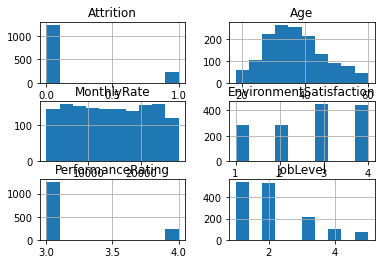

In [13]:
hr.mean()
hr.hist()

Here is the histogram for our response variable, Attrition. 

<AxesSubplot:>

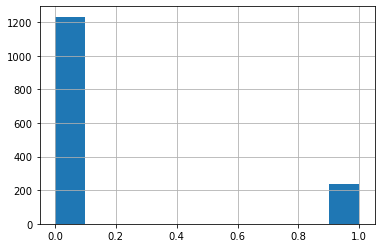

In [14]:
hr["Attrition"].hist()

Because Attrition has so few 1s (examples of attrition) we have chosen to weight our logistic regression. 

Here is the histogram of Environmental Satisfaction:

<AxesSubplot:>

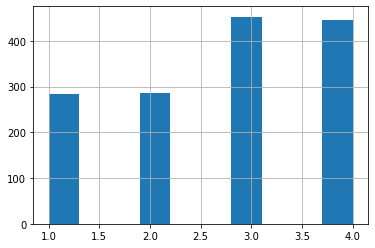

In [15]:
hr["EnvironmentSatisfaction"].hist()

We can see that the environment is right skewed. This doesn't matter much, however, as we are planning to one-hot anyways. For our exploratory analysis, however, here is a boxplot of environment vs attrition: 

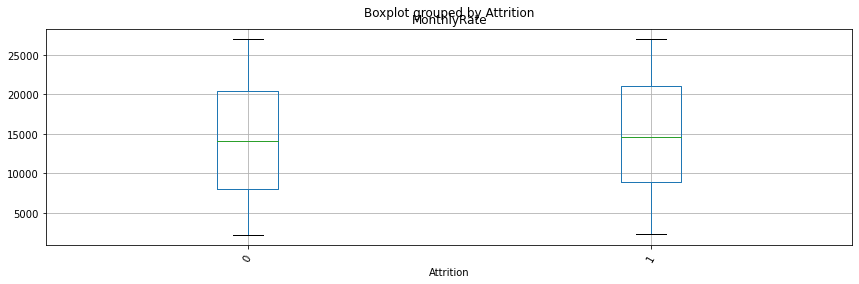

In [16]:
hr.boxplot (column="MonthlyRate", by="Attrition", figsize=(14,4), rot=60)
plt.show()

This plot does suggest that there are higher levels of attrition with lower environmental level. So is the distrubution of attrition different when the environmental satisfaction is very low? 

array([[<AxesSubplot:title={'center':'EnvironmentSatisfaction'}>]],
      dtype=object)

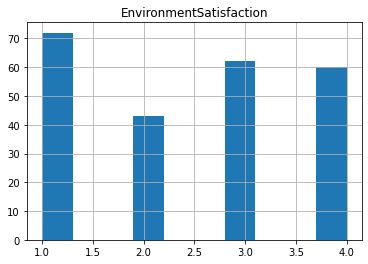

In [17]:
yesattrition = hr[hr["Attrition"] == 1]
environmentwithattrition = yesattrition[["EnvironmentSatisfaction"]]
environmentwithattrition.hist()

The percentage rate of attrition seems to be higher, but there's not a huge difference. Likewise, we can ask if we see less environmental satisfaction when there is attrition: 

array([[<AxesSubplot:title={'center':'EnvironmentSatisfaction'}>]],
      dtype=object)

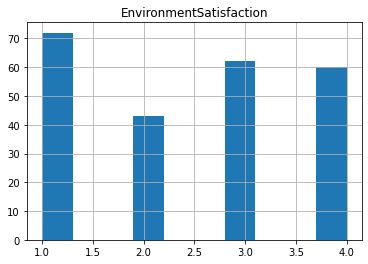

In [18]:
yesattrition = hr[hr["Attrition"] == 1]
environmentwithattrition = yesattrition[["EnvironmentSatisfaction"]]
environmentwithattrition.hist()

We see a skew towards a lower distribution, but there is not a huge difference. 

Now that we have done some exploratory analysis, we will one-hot encode the rest of the catagorical variables:

In [19]:
# One-hot encode "Environment Satisfaction"
dummy = pd.get_dummies(hr['EnvironmentSatisfaction'])
dummy.columns = ["EnvSatis1", "EnvSatis2", "EnvSatis3", "EnvSatis4"]
hr = hr.drop('EnvironmentSatisfaction',axis = 1)
hr = hr.join(dummy)

In [20]:
# One-hot encode "JobLevel"
dummy = pd.get_dummies(hr['JobLevel'])
#dummy
dummy.columns = ["JobLevel1", "JobLevel2", "JobLevel3", "JobLevel4", "JobLevel5"]
hr = hr.drop('JobLevel',axis = 1)
hr = hr.join(dummy)

In [21]:
# One-hot encode "PerformanceRating"
dummy = pd.get_dummies(hr['PerformanceRating'])
dummy.columns = ["PerformanceRating3", "PerformanceRating4"]
hr = hr.drop('PerformanceRating',axis = 1)
hr = hr.join(dummy)

Here is the scatterplot matrix for the data. The fact that many of the varibles are one-hot encoded means that among those catagorical variables it is not very helpful.

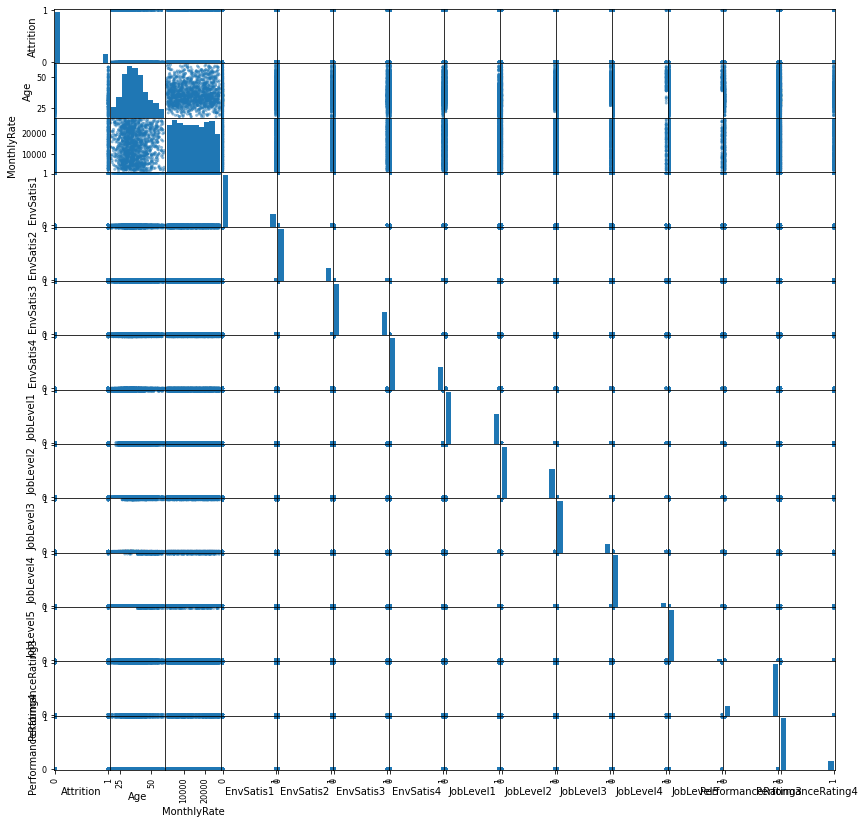

In [22]:
pd.plotting.scatter_matrix (hr, figsize=(14,14))
plt.show()

## Decision Tree

In [23]:
## Re read the data again before cleaning and manipulation
hr = pd.read_csv ("HR.csv")
print (hr.shape)
hr
# One-hot encode "Attrition"
dummy = pd.get_dummies(hr['Attrition'])
dummy = dummy.drop("No", axis = 1)
dummy.columns = ["Attrition"]
hr = hr.drop('Attrition',axis = 1)
hr = hr.join(dummy)
hr = hr[["Attrition", "Age", "MonthlyRate", "EnvironmentSatisfaction", "PerformanceRating", "JobLevel"]]

(1470, 35)


In [24]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Attrition                1470 non-null   uint8
 1   Age                      1470 non-null   int64
 2   MonthlyRate              1470 non-null   int64
 3   EnvironmentSatisfaction  1470 non-null   int64
 4   PerformanceRating        1470 non-null   int64
 5   JobLevel                 1470 non-null   int64
dtypes: int64(5), uint8(1)
memory usage: 59.0 KB


In [25]:
#split dataset in features and target variable
feature_cols = ["Age", "MonthlyRate", "EnvironmentSatisfaction", "PerformanceRating", "JobLevel"]
X = hr[feature_cols] # Features
y = hr.Attrition # Target variable

In [26]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(max_depth=2)
dectree.fit (X, y)

DecisionTreeClassifier(max_depth=2)

In [27]:
type (y[1])
np.unique (y)

array([0, 1], dtype=uint8)

In [28]:
from sklearn.model_selection import train_test_split # Import train_test_split function
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

In [29]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

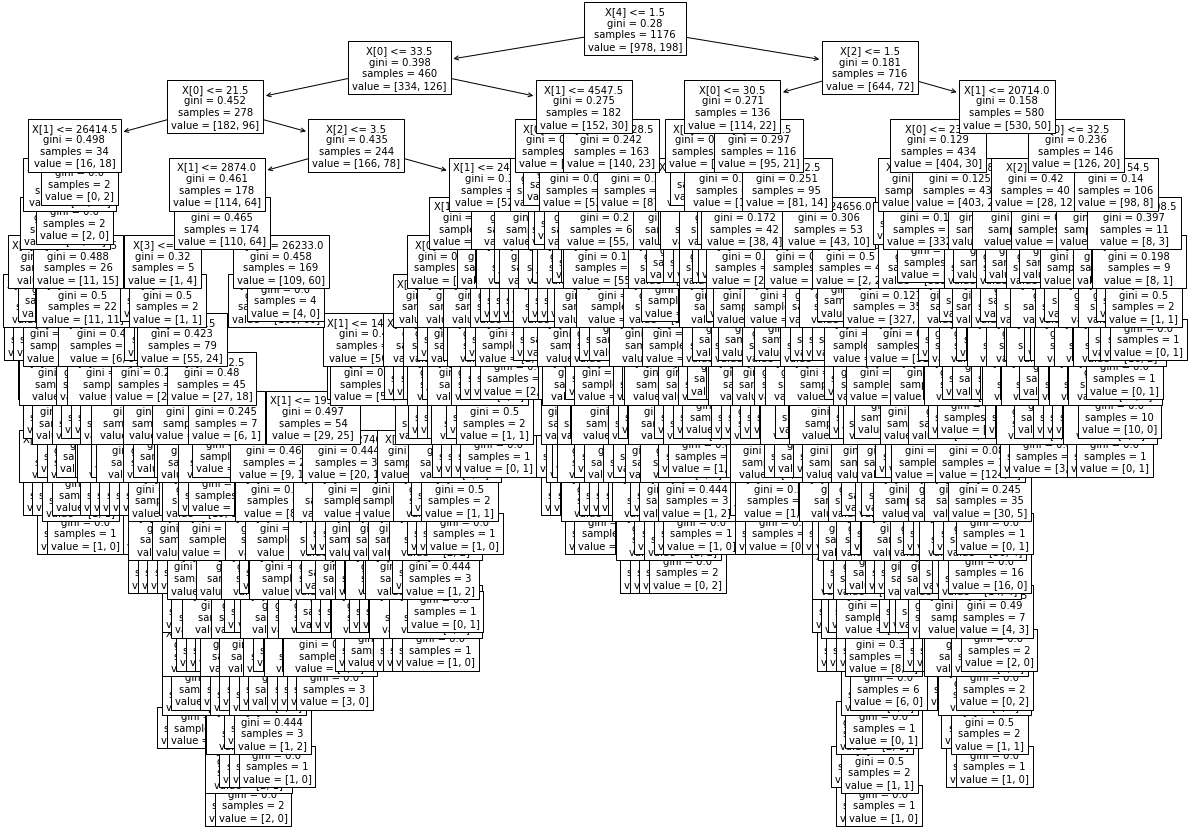

In [30]:
import matplotlib.pyplot as plt
import sklearn.tree as tree
fig, ax = plt.subplots(figsize=(20, 15))
tree.plot_tree(clf, fontsize=10)
plt.show()

In [31]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7551020408163265
Precision: 0.16326530612244897
Recall: 0.20512820512820512


The accuracy is 0.755 which is fairly high, but the precision and recall are both very los at 0.16 and 0.2. This likely reflects the low rate of attrition (overall accuracy is good but ability to identify attrition is not because it tends to just assume no attrition).

In [32]:
feature_imp = pd.DataFrame(clf.feature_importances_)
feature_imp.rename (columns={0: "Importance"})
feature_imp.set_index (X.columns)

,0
Age,0.250265
MonthlyRate,0.527315
EnvironmentSatisfaction,0.104574
PerformanceRating,0.040886
JobLevel,0.076960


In [105]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8707482993197279
Precision: 0.5714285714285714
Recall: 0.10256410256410256


The accuracy and precision are now both above 50%, and the accuracy score of 0.8707 is quite good. The recall score, however, is abysmal at 0.1025. The model really struggles to classify positive samples. 

In [33]:
##Use GridSearchCV to evaluate different settings for max depth and min leaf size. 
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':(2, 3, 4, 5, 6, 7), 'min_samples_leaf':(1, 2, 3, 4, 5)}
clf = DecisionTreeClassifier (random_state=42)
clf_gs = GridSearchCV (clf, parameters, scoring='f1')
clf_gs.fit (X, y)
gs_results = pd.DataFrame (clf_gs.cv_results_)
print (clf_gs.best_estimator_)
print ("Best parameters:", clf_gs.best_params_)
gs_results

DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, random_state=42)
Best parameters: {'max_depth': 7, 'min_samples_leaf': 2}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003448,0.000369,0.003035,0.000092,2,1,"{'max_depth': 2, 'min_samples_leaf': 1}",0.000000,0.000000,0.000000,0.075472,0.000000,0.015094,0.030189,26
1,0.003191,0.000065,0.002965,0.000117,2,2,"{'max_depth': 2, 'min_samples_leaf': 2}",0.000000,0.000000,0.000000,0.075472,0.000000,0.015094,0.030189,26
2,0.003130,0.000023,0.002979,0.000062,2,3,"{'max_depth': 2, 'min_samples_leaf': 3}",0.000000,0.000000,0.000000,0.075472,0.000000,0.015094,0.030189,26
3,0.003126,0.000026,0.002905,0.000034,2,4,"{'max_depth': 2, 'min_samples_leaf': 4}",0.000000,0.000000,0.000000,0.075472,0.000000,0.015094,0.030189,26
4,0.003188,0.000062,0.002924,0.000036,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.000000,0.000000,0.000000,0.075472,0.000000,0.015094,0.030189,26
5,0.003367,0.000024,0.002950,0.000043,3,1,"{'max_depth': 3, 'min_samples_leaf': 1}",0.037037,0.175439,0.037037,0.037736,0.076923,0.072834,0.053552,16
6,0.003346,0.000015,0.002935,0.000032,3,2,"{'max_depth': 3, 'min_samples_leaf': 2}",0.037037,0.175439,0.037037,0.038462,0.076923,0.072979,0.053458,12
7,0.003345,0.000057,0.002916,0.000005,3,3,"{'max_depth': 3, 'min_samples_leaf': 3}",0.037037,0.175439,0.037037,0.038462,0.076923,0.072979,0.053458,12
8,0.003341,0.000020,0.002931,0.000042,3,4,"{'max_depth': 3, 'min_samples_leaf': 4}",0.037037,0.175439,0.037037,0.038462,0.076923,0.072979,0.053458,12
9,0.003396,0.000074,0.002920,0.000027,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.037037,0.175439,0.037037,0.038462,0.076923,0.072979,0.053458,12


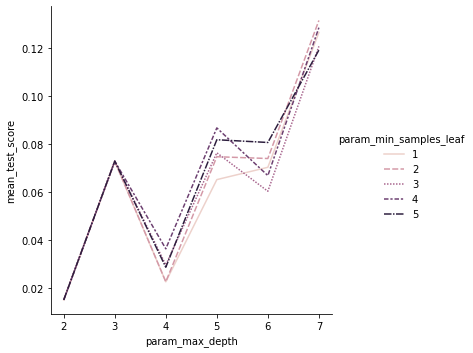

In [34]:
import seaborn as sb
sb.relplot (kind='line', x=gs_results.param_max_depth, y=gs_results.mean_test_score, 
             hue=gs_results.param_min_samples_leaf, style=gs_results.param_min_samples_leaf)
plt.show()

The results point to max_depth = 6 and min_samples_leaf = 5.The data is a fictional data set that we are training our models on therefore the model is a little bit biased in terms of maximizing the accuracy. However according to the Grid search using the decision tree we made ,max_depth=7, min_samples_leaf=2 and those are the best parameters.

## The Total impurity of leaves vs effective alphas of pruned tree

The minimum cost complexity pruning process finds the node with the weakest link.The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

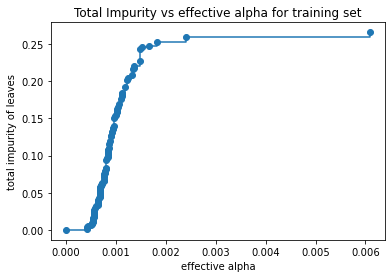

In [35]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Instead of a two stacked bar charts of the leaf node results, one with relative percentage of the positive and negative outcomes, and one with the actual counts of positive and negative outcomes, we decided to do a minimum cost pruning process that identifies the weakest link. This was so that the model effectively represent our dataset given the unpredictability with working with a data sets that predicts human behavior. The strongest feature was the monthly rate which went against our intiution that attrition was contributed by job level or age but we were also cautious of the context of the data being fictional, therefore reported appropriately. Therefore, the wekest link from the above process woukd have been from the perfomance rating. 

## Logistic Regression

In [124]:
# Split data into training and test data
# Split data into training and test data
hrdata = hr.copy()
hr = hrdata.sample(frac=0.66, random_state=25)
hrtest = hrdata.drop(hr.index)
print(f"No. of training examples: {hr.shape[0]}")
print(f"No. of testing examples: {hrtest.shape[0]}")

No. of training examples: 970
No. of testing examples: 500


In [125]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression (class_weight='balanced')
X = hr.iloc [:, 1:14]
y = hr.Attrition
clf.fit (X=X, y=y)
hr["pred"] = clf.predict (X)
pd.crosstab (y, hr.pred)

pred,0,1
Attrition,,
0,540,282
1,51,97


Our first try at logistic regression has a high number of false positives. This is a trade-off for the relatively low number of false negative we want to see, as we care more about identifying cases of attrition than we do overall accuracy. Still, there are about 140 cases of attrition and the model only identifies half of them. This is concerning. 

We move onto scalining and standardizing: 

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame (scaler.transform(X))
print (X.describe().T)
print (type (X_scaled))
X_scaled.columns = X.columns
print (X_scaled.describe().T)

                    count          mean          std     min      25%  \
Age                 970.0     37.136082     9.155803    18.0    30.25   
MonthlyRate         970.0  14132.162887  7116.472873  2094.0  7797.00   
EnvSatis1           970.0      0.192784     0.394688     0.0     0.00   
EnvSatis2           970.0      0.195876     0.397078     0.0     0.00   
EnvSatis3           970.0      0.307216     0.461578     0.0     0.00   
EnvSatis4           970.0      0.304124     0.460273     0.0     0.00   
JobLevel1           970.0      0.364948     0.481664     0.0     0.00   
JobLevel2           970.0      0.371134     0.483357     0.0     0.00   
JobLevel3           970.0      0.140206     0.347380     0.0     0.00   
JobLevel4           970.0      0.074227     0.262275     0.0     0.00   
JobLevel5           970.0      0.049485     0.216989     0.0     0.00   
PerformanceRating3  970.0      0.844330     0.362729     0.0     1.00   
PerformanceRating4  970.0      0.155670     0.36272

In [127]:
clf = LogisticRegression(class_weight='balanced')
clf.fit (X=X_scaled, y=y)
hr["pred"] = clf.predict (X_scaled)
pd.crosstab (y, hr.pred)

pred,0,1
Attrition,,
0,522,300
1,46,102


Scaling has improved the model, as we are now identifying a larger percentage of the true attrition cases than we were before. The number of false positives, however, has gone up. Still concerning. 

We will add polynomial features: 

In [128]:
Xlog = X.copy()
print (Xlog)

      Age  MonthlyRate  EnvSatis1  EnvSatis2  EnvSatis3  EnvSatis4  JobLevel1  \
942    36         5747          0          0          0          1          0   
415    34        12253          0          0          0          1          1   
1259   30         9128          0          0          1          0          0   
466    41         5626          0          1          0          0          0   
424    57        22102          1          0          0          0          0   
...   ...          ...        ...        ...        ...        ...        ...   
661    43        23814          1          0          0          0          0   
1212   34        20338          0          1          0          0          1   
1312   31        21495          0          0          0          1          1   
834    34         5829          0          1          0          0          0   
509    33         5335          0          0          1          0          0   

      JobLevel2  JobLevel3 

In [129]:
Xlog.describe().T
scaler = StandardScaler().fit(Xlog)
Xlog = pd.DataFrame (scaler.transform (Xlog))
Xlog.describe().T

,count,mean,std,min,25%,50%,75%,max
0,970.0,1.085615e-16,1.000516,-2.091128,-0.752488,-0.124147,0.640790,2.498493
1,970.0,-5.036063e-18,1.000516,-1.692464,-0.890670,-0.023994,0.886653,1.808968
2,970.0,-3.720964e-16,1.000516,-0.488697,-0.488697,-0.488697,-0.488697,2.046257
3,970.0,5.665571e-17,1.000516,-0.493548,-0.493548,-0.493548,-0.493548,2.026145
4,970.0,-8.355287e-17,1.000516,-0.665922,-0.665922,-0.665922,1.501677,1.501677
5,970.0,-1.991534e-17,1.000516,-0.661088,-0.661088,-0.661088,1.512658,1.512658
6,970.0,-2.456225e-16,1.000516,-0.758073,-0.758073,-0.758073,1.319133,1.319133
7,970.0,-3.630544e-16,1.000516,-0.768221,-0.768221,-0.768221,1.301708,1.301708
8,970.0,-1.534855e-16,1.000516,-0.403819,-0.403819,-0.403819,-0.403819,2.476359
9,970.0,-3.576749e-16,1.000516,-0.283158,-0.283158,-0.283158,-0.283158,3.531603


Here are the more specific stats for the scaled logistic regression before we move on to recall:

In [130]:
from sklearn.metrics import *
print ("precision:", round (precision_score (y, hr.pred), 4))
print ("recall:   ", round (recall_score (y, hr.pred), 4))
print ("F1 score: ", round (f1_score (y, hr.pred), 4))

precision: 0.2537
recall:    0.6892
F1 score:  0.3709


We have a precision of 0.2537, which is way under the .5 threshold we would be looking for (better than random chance). The recall score is pretty good at 0.6892 is about our best score, and does represent the fact that we prioritized finding cases of attrition. 

In [131]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures (degree = 2)
X_poly = pd.DataFrame (poly.fit_transform (Xlog))
print (Xlog.shape)
print (X_poly.shape)
print (X_poly.head(10))

(970, 13)
(970, 105)
   0         1         2         3         4         5         6         7    \
0  1.0 -0.124147 -1.178883 -0.488697 -0.493548 -0.665922  1.512658 -0.758073   
1  1.0 -0.342701 -0.264194 -0.488697 -0.493548 -0.665922  1.512658  1.319133   
2  1.0 -0.779807 -0.703543 -0.488697 -0.493548  1.501677 -0.661088 -0.758073   
3  1.0  0.422236 -1.195895 -0.488697  2.026145 -0.665922 -0.661088 -0.758073   
4  1.0  2.170663  1.120492  2.046257 -0.493548 -0.665922 -0.661088 -0.758073   
5  1.0 -0.670531  0.266960  2.046257 -0.493548 -0.665922 -0.661088  1.319133   
6  1.0  0.422236  0.936598 -0.488697 -0.493548  1.501677 -0.661088 -0.758073   
7  1.0  0.312959  1.136660 -0.488697 -0.493548  1.501677 -0.661088 -0.758073   
8  1.0 -0.342701  0.640231 -0.488697 -0.493548 -0.665922  1.512658 -0.758073   
9  1.0 -0.670531 -0.813486 -0.488697  2.026145 -0.665922 -0.661088 -0.758073   

        8         9    ...        95        96        97        98        99   \
0 -0.768221  2.47

Here is a quick plot showing our coefficients: 

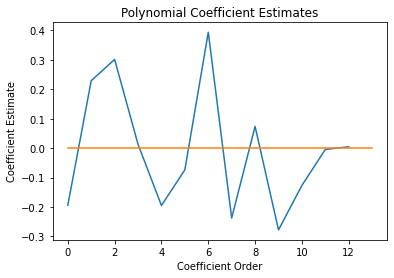

In [132]:
coeffs = pd.DataFrame (clf.coef_.T)
coeffs.columns = ["Coef_Est"]
plt.plot (np.arange (13), coeffs.Coef_Est)
plt.plot ([0,13], [0,0])
plt.title ("Polynomial Coefficient Estimates")
plt.xlabel ("Coefficient Order")
plt.ylabel ("Coefficient Estimate")
plt.show()

We see coefficient 6 and 2 have higher estimates. We will not explore this too much further, however, given that our model is so poor. The logistic regression is not a good enough representation of the data for the coefficients to be a good representation of the relationships within the data. 

Finally, the test with poly features:

In [133]:
LR2clf = LogisticRegression(max_iter=1000, class_weight='balanced')
LR2clf.fit (X=X_poly, y=y)
hr["LR2pred"] = LR2clf.predict(X_poly)
pd.crosstab (y, hr.LR2pred)

LR2pred,0,1
Attrition,,
0,553,269
1,38,110


In [139]:
from sklearn.metrics import *
print ("precision:", round (precision_score (y, hr.LR2pred), 4))
print ("recall:   ", round (recall_score (y, hr.LR2pred), 4))
print ("F1 score: ", round (f1_score (y, hr.LR2pred), 4))

precision: 0.2902
recall:    0.7432
F1 score:  0.4175


This model is definitely an improvement. The precision score is up about 5% from the previous model with 0.29, the recall is up to around 0.75, and the F1 score is at least closer to 0.5, at 0.41. Given that 2/3 of these numbers are below the 0.5 threshold, we still wouldn't classify it as a "good" model, but a recall score of 0.75 better justifies some of the shortcomings in precision and F1, especially since those numbers have also crept up a little. 

Now we will run the test data. 

In [134]:
X = hrtest.iloc [:, 1:14]
y2 = hrtest.Attrition
X_scaled = pd.DataFrame (scaler.transform(X))
poly = PolynomialFeatures (degree = 2)
X_poly2 = pd.DataFrame (poly.fit_transform (X_scaled))
hrtest["Attritionpredict"] = LR2clf.predict (X_poly2)
pd.crosstab (hrtest.Attrition, hrtest.Attritionpredict)

Attritionpredict,0,1
Attrition,,
0,249,162
1,31,58


In [141]:
from sklearn.metrics import *
print ("precision:", round (precision_score (y2, hrtest.Attritionpredict), 4))
print ("recall:   ", round (recall_score (y2, hrtest.Attritionpredict), 4))
print ("F1 score: ", round (f1_score (y2, hrtest.Attritionpredict), 4))

precision: 0.2636
recall:    0.6517
F1 score:  0.3754


The test data scores are more comporable to what we saw with the training model without polynomial featurs. At this point, I think we have to accept that with our current variables, we do not have a good model. The precision and F1 score are both below 0.5, and the recall is not all that far from 0.5 at 0.6517. 

In [135]:
from sklearn.model_selection import cross_val_score, cross_val_predict
precision_scores = cross_val_score (clf, X_poly, y, scoring='precision')
print ("Cross Val Precision:", np.round (precision_scores, 4),
       "Mean:", np.round (np.mean (precision_scores), 4),
       "StDev:", np.round (np.std (precision_scores), 4))
       
recall_scores = cross_val_score (clf, X_poly, y, scoring='recall')
print ("Cross Val Recall:   ", np.round (recall_scores, 4),
       "Mean:", np.round (np.mean (recall_scores), 4),
       "StDev:", np.round (np.std (recall_scores), 4))
       
f1_scores = cross_val_score (clf, X_poly, y, scoring='f1')
print ("Cross Val F1-Score: ",  np.round (f1_scores, 4),
       "Mean:", np.round (np.mean (f1_scores), 4),
       "StDev:", np.round (np.std (f1_scores), 4))
       
cv_pred = cross_val_predict (clf, X_poly, y)
print ("\nOverall CV Precision", np.round (precision_score (y, cv_pred), 4))
print ("Overall CV Recall   ", np.round (recall_score (y, cv_pred), 4))
print ("Overall CV f1_macro ", np.round (f1_score (y, cv_pred), 4))
print ("Cross Validated Confusion Matrix:")
pd.crosstab (y, cv_pred)

C:\Users\ethedens\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ethedens\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Cross Val Precision: [0.2466 0.241  0.2676 0.2899 0.1591] Mean: 0.2408 StDev: 0.0444


C:\Users\ethedens\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ethedens\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Cross Val Recall:    [0.6207 0.6897 0.6333 0.6667 0.4667] Mean: 0.6154 StDev: 0.0782


C:\Users\ethedens\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ethedens\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Cross Val F1-Score:  [0.3529 0.3571 0.3762 0.404  0.2373] Mean: 0.3455 StDev: 0.057

Overall CV Precision 0.237
Overall CV Recall    0.6149
Overall CV f1_macro  0.3421
Cross Validated Confusion Matrix:


C:\Users\ethedens\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ethedens\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

col_0,0,1
Attrition,,
0,529,293
1,57,91


These scores are similar enough to what we've seen with the previous scores that we feel we do not need to discuss them again. The weighted logistic regression is not a quality model. 

## Conclusion 

Due to time constraints (and our lack of prior knowledge about the ability to weight a decision tree) we ended up with two different approaches; the weighted logistic regression and the unweighted decision tree. The decision tree reported a high level of precision, but very low recall and F1. The weighted logistic regression demonstrated a decent level of recall, but low precision and F1. We do not think we were able to model attrition well with either approach. The unweighted decision tree was unable to find cases of attrition, and the weighted logistic regression often falsly classified cases as attrition. 

Age, Monthly Rate, Job Level are at the top of Fisher's importance. They were also at the top of our coefficients. These importances are set, however, by an inaccurate model. 

We are unable to answer our questions conclusively due to out poor model. But it is possible that the addition of the varibles which we cut from the larger set would improve the logistic regression. With our current variables, however, we were unable to produce an accurate enough model for more thorough analysis. 
